# PA 2: Classification - Nearest Neighbors

## <b>Please consult the TA before using any other packages apart from sklearn,numpy,pandas, matplotlib and seaborn<b>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn import neighbors as skn
from sklearn.feature_selection import SelectKBest, chi2, f_regression
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Loading dataset

In [6]:
#importing data
titanic=pd.read_csv('/content/drive/MyDrive/datasets/titanic.csv')
#changing column names to lower case for easy access
titanic.columns= titanic.columns.str.lower()

titanic.info()
titanic.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   name      891 non-null    object 
 3   sex       891 non-null    object 
 4   age       714 non-null    float64
 5   sibsp     891 non-null    int64  
 6   parch     891 non-null    int64  
 7   ticket    891 non-null    object 
 8   fare      891 non-null    float64
 9   cabin     204 non-null    object 
 10  embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Preprocessing

In [7]:
#data preprocessing

#dropping columns that are self descriptive and doesnt add any logical advantage to the data
titanic.drop(['name', 'ticket', 'cabin'], axis=1, inplace=True)

#finding count of null values in columns
attr_list = list(titanic.columns.values)
for item in attr_list:
    print (item,": ",sum(pd.isnull(titanic[item])))

survived :  0
pclass :  0
sex :  0
age :  177
sibsp :  0
parch :  0
fare :  0
embarked :  2


#Handling null values

In [8]:
#replacing the columns containing null values with appropriate values
#age - median , embarked - mode
titanic["age"] = titanic["age"].interpolate()#.fillna(titanic["age"].median())
#titanic['embarked'].mode()
titanic["embarked"] = titanic["embarked"].fillna('S')

print(titanic.head())
#sex and embarked are the string columns that cannot be used unless replaced with numeric categories.

   survived  pclass     sex   age  sibsp  parch     fare embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S


# Best 3 attributes for training and testing the model.

In [9]:
###Select best 3 attributes for training and testing your model.

#Categorizing into numeric codes
titanic['embarked'].replace('S',1, inplace=True)
titanic['embarked'].replace('C',2, inplace=True)
titanic['embarked'].replace('Q',3, inplace=True)

titanic['sex'].replace('male',1, inplace=True)
titanic['sex'].replace('female',2, inplace=True)

titanic.head()

#seperating the dataframe into source(X) and target(y)
X = titanic.loc[:, titanic.columns != 'survived']
print(X)
y = titanic['survived'].copy()

#calculating scores for all the attributes which shows how dependent the target is on them.
X_clf_new=SelectKBest(score_func=chi2,k=3).fit_transform(X,y)
bestfeatures = SelectKBest(score_func=chi2, k=len(X.columns))
fit = bestfeatures.fit(X, y)

scoredata = pd.DataFrame()
scoredata['Attributes'] = list(X.columns)
scoredata['Scores'] = fit.scores_
scoredata.sort_values(by="Scores", ascending=False, inplace=True)
print(scoredata)

     pclass  sex   age  sibsp  parch     fare  embarked
0         3    1  22.0      1      0   7.2500         1
1         1    2  38.0      1      0  71.2833         2
2         3    2  26.0      0      0   7.9250         1
3         1    2  35.0      1      0  53.1000         1
4         3    1  35.0      0      0   8.0500         1
..      ...  ...   ...    ...    ...      ...       ...
886       2    1  27.0      0      0  13.0000         1
887       1    2  19.0      0      0  30.0000         1
888       3    2  22.5      1      2  23.4500         1
889       1    1  26.0      0      0  30.0000         2
890       3    1  32.0      0      0   7.7500         3

[891 rows x 7 columns]
  Attributes       Scores
5       fare  4518.319091
1        sex    44.389470
0     pclass    30.873699
2        age    22.361795
4      parch    10.097499
6   embarked     3.013771
3      sibsp     2.581865


# Splitting dataset 75% for training, and 25% for testing the classifier

Text(0, 0.5, 'Error Rate')

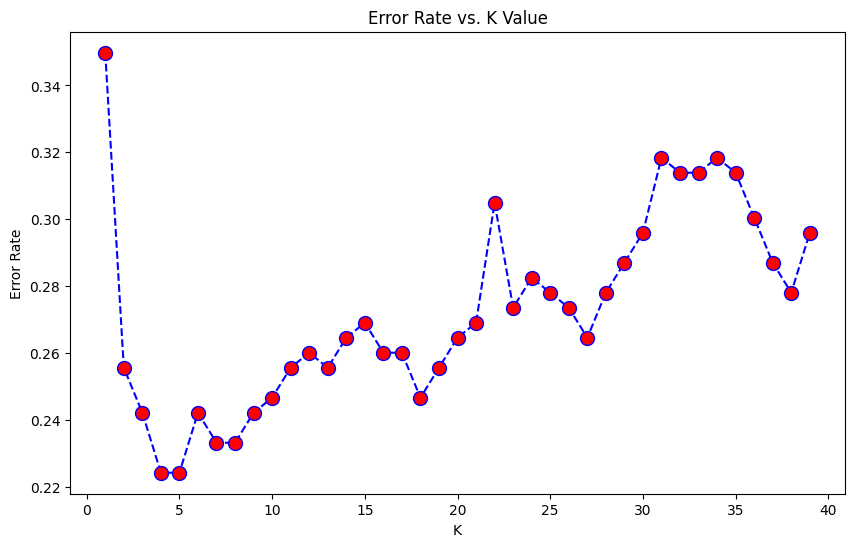

In [13]:

X_final = X[['fare','sex','pclass']].copy()
X_train, X_test, y_train, y_test = train_test_split(X_final, y, stratify=y, test_size=0.25)

##Find the best K using elbow method. Explain what other ways can we use to find the best value of K.
error_rate = list()
for i in range(1,40):
    knn = skn.KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

#Eucledian Distance

### From the above error rate Vs Kvalue plot we can see that K=5 has the minimum error rate which makes best k=5

Confusion Matrix:
 [[111  26]
 [ 24  62]]
Confusion Matrix:
 Axes(0.125,0.11;0.62x0.77)
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.81      0.82       137
           1       0.70      0.72      0.71        86

    accuracy                           0.78       223
   macro avg       0.76      0.77      0.76       223
weighted avg       0.78      0.78      0.78       223



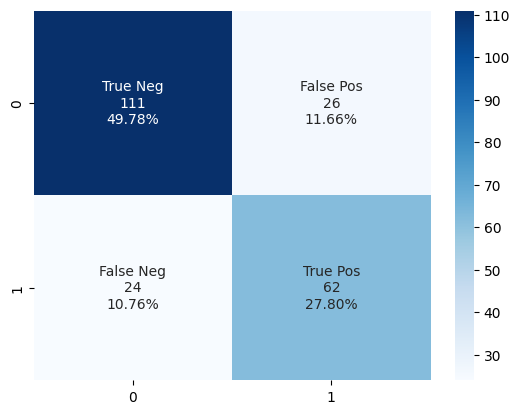

In [14]:

#the optimal value for classification
classifier1 = skn.KNeighborsClassifier(n_neighbors=5, metric='euclidean')
classifier1.fit(X_train, y_train) #training the mode
y_pred = classifier1.predict(X_test)
cf=confusion_matrix(y_test, y_pred)

print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))

#visualizing confusion matrix
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf.flatten()/np.sum(cf)]
labels = list()
for v1, v2, v3 in zip(group_names,group_counts,group_percentages):
    labels.append(f"{v1}\n{v2}\n{v3}")
labels = np.asarray(labels).reshape(2,2)
print("Confusion Matrix:\n",sns.heatmap(cf, annot=labels, fmt='', cmap='Blues'))
print("Classification Report:\n",classification_report(y_test, y_pred))

## Fits the classifier for different K-values

K-value=1

[[89 48]
 [30 56]]
              precision    recall  f1-score   support

           0       0.75      0.65      0.70       137
           1       0.54      0.65      0.59        86

    accuracy                           0.65       223
   macro avg       0.64      0.65      0.64       223
weighted avg       0.67      0.65      0.65       223



K-value=5

[[111  26]
 [ 24  62]]
              precision    recall  f1-score   support

           0       0.82      0.81      0.82       137
           1       0.70      0.72      0.71        86

    accuracy                           0.78       223
   macro avg       0.76      0.77      0.76       223
weighted avg       0.78      0.78      0.78       223



K-value=100

[[126  11]
 [ 70  16]]
              precision    recall  f1-score   support

           0       0.64      0.92      0.76       137
           1       0.59      0.19      0.28        86

    accuracy                           0.64       223
   macro avg       0.62 

Text(0, 0.5, 'Error Rate')

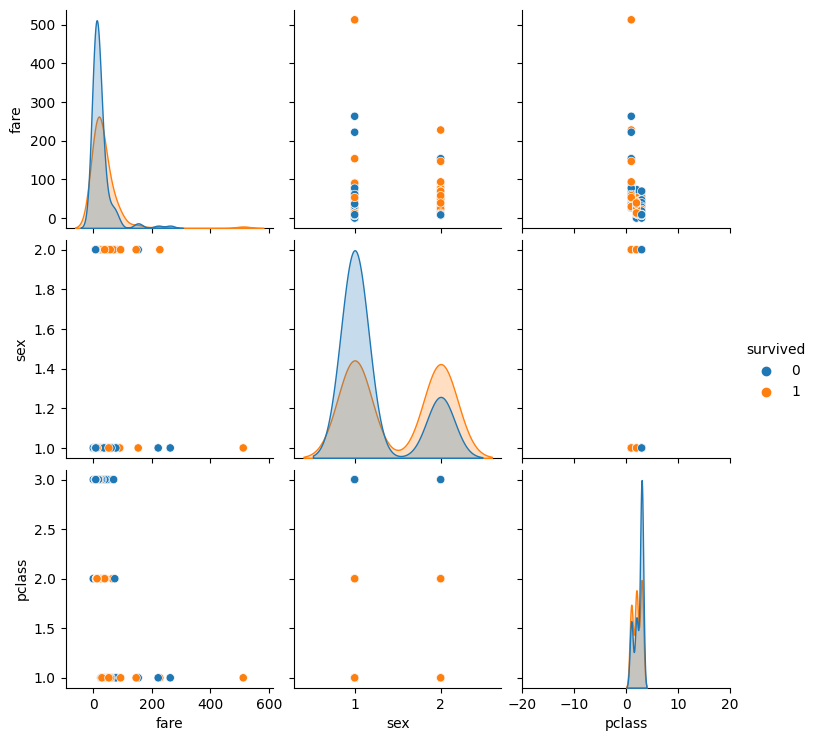

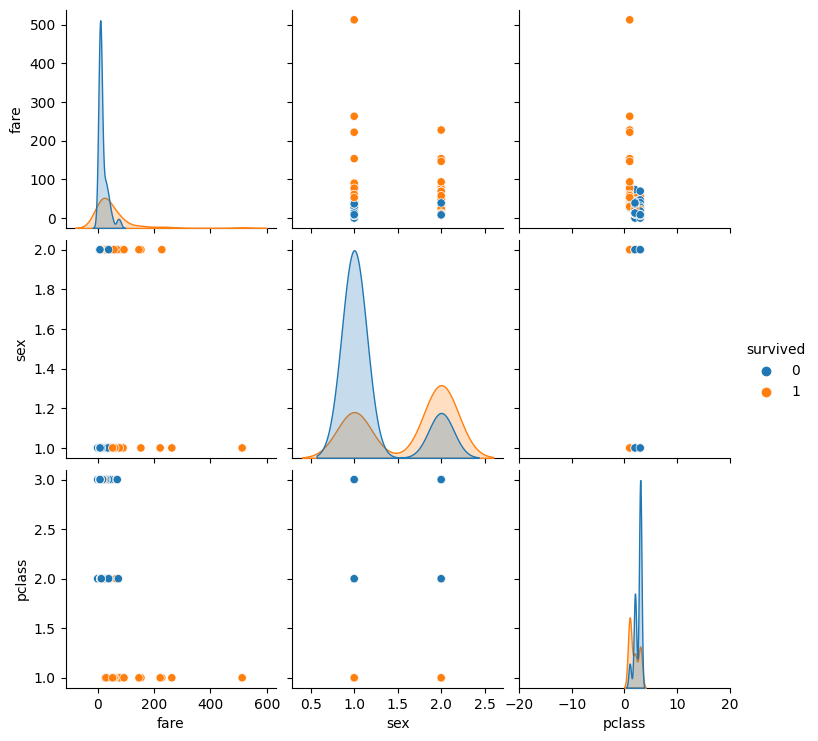

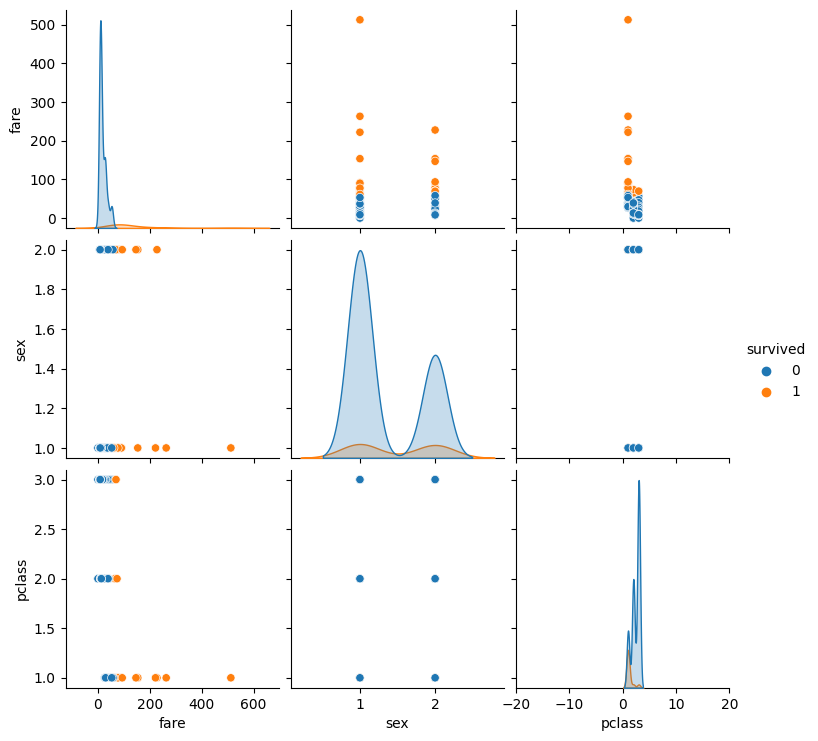

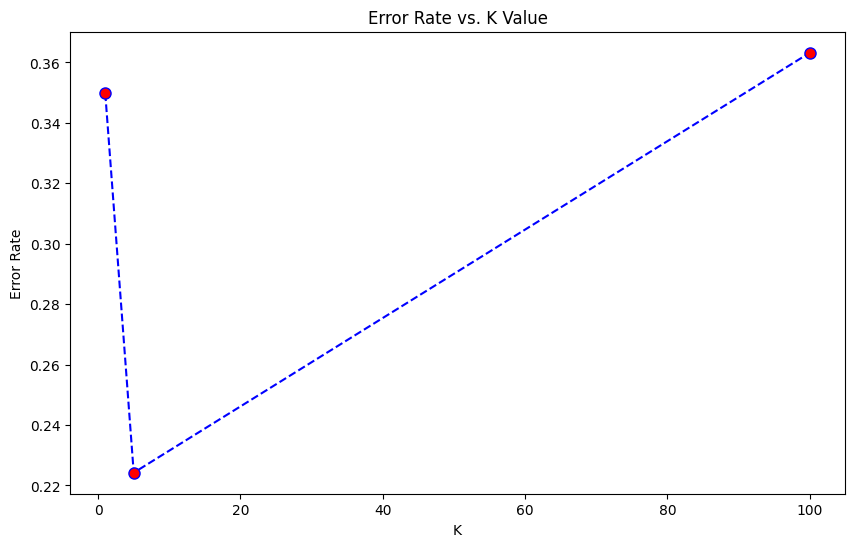

In [15]:
#this code fits the classifier for different k values
def trainclassifier(k):
    classifier = skn.KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    classifier.fit(X_train,y_train)
    pred = classifier.predict(X_test)
    print("K-value="+str(k)+"\n")
    print(confusion_matrix(y_test,pred))
    clr1= classification_report(y_test,pred)
    clr = classification_report(y_test,pred, output_dict=True)

    #prepping a final dataframe with test values and predicted outcomes
    fdf = X_test.copy()
    pd.DataFrame(pred).reset_index(drop=True, inplace=True)
    fdf['survived'] = pred.copy()

    #To get a plot for all the attributes with the predicted values.
    g = sns.pairplot(fdf,hue='survived')
    g.axes[0,2].set_xlim((0,40))
    g.axes[1,2].set_xlim((-20,20))

    error = np.mean(pred != y_test)
    print(clr1)
    print("\n")
    return [clr['accuracy'],error]

accuracies = list()
error_rate = list()
kvals = [1,5,100]
for k in kvals:
    result = trainclassifier(k)
    accuracies.append(result[0])
    error_rate.append(result[1])

##Calculate and print the confusion matrix, and the classification Report
#(includes:precision, recall, f1-score, and support) for all three different numbers.
#**Plot the Error rate vs. K-value**
plt.figure(figsize=(10,6))
plt.plot(kvals,error_rate,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=8)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')


<Figure size 2000x1500 with 0 Axes>

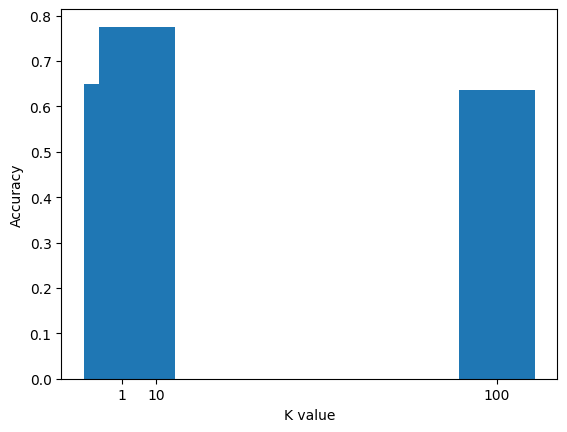

<Figure size 2000x1500 with 0 Axes>

In [16]:
#Plot the classifier in a 2D projection.
plt.bar(kvals, accuracies, width = 20)
plt.xlabel('K value')
plt.ylabel('Accuracy')
ticks = [1, 10, 100]
plt.xticks(ticks, ticks)
plt.figure(figsize=(20, 15))